Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection and Preprocessing

Reading Dataset

In [ ]:
df = pd.read_csv('/content/Quality of Service 5G.csv')
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,09-03-2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,09-03-2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,09-03-2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,09-03-2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,09-03-2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [ ]:
df.shape

(400, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


Handling Missing Values


In [ ]:
df.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

Note : There are no missing values in the dataset

Removing unwanted features (User_ID and Timestamp)

In [ ]:
new_df = df.drop(['Timestamp', 'User_ID'], axis=1)
new_df.head()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


Handling Categorical Columns (Label Encoding)

In [ ]:
new_df.Application_Type.nunique()

11

In [ ]:
new_df.Application_Type.value_counts()

Video_Call             58
Web_Browsing           48
Streaming              47
Emergency_Service      47
Background_Download    47
Video_Streaming        47
VoIP_Call              46
Online_Gaming          45
IoT_Temperature        13
Voice_Call              1
File_Download           1
Name: Application_Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['Application_Type'] = le.fit_transform(new_df['Application_Type'])
new_df.head()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,6,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,5,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,1,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,4,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [ ]:
data = pd.DataFrame({'index':[0,1,2,3,4,5,6,7,8,9,10],
        'Application_Type':['Video_Call','Web_Browsing','Streaming','Emergency_Service','Background_Download','Video_Streaming','VoIP_Call','Online_Gaming','IoT_Temperature','Voice_Call','File_Download']})
data['ID'] = le.fit_transform(data['Application_Type'].values)
data = data.drop_duplicates('Application_Type').set_index('index')
print(data)

          Application_Type  ID
index                         
0               Video_Call   6
1             Web_Browsing  10
2                Streaming   5
3        Emergency_Service   1
4      Background_Download   0
5          Video_Streaming   7
6                VoIP_Call   8
7            Online_Gaming   4
8          IoT_Temperature   3
9               Voice_Call   9
10           File_Download   2


Regex Clenaing

In [ ]:
# Removing units of Signal_Strength, Latenecy, Resource Allocation

new_df['Signal_Strength'] = new_df['Signal_Strength'].str.extract('(\d+)').astype(int)
new_df['Latency'] = new_df['Latency'].str.extract('(\d+)').astype(int)
new_df['Resource_Allocation'] = new_df['Resource_Allocation'].str.extract('(\d+)').astype(int)

In [ ]:
new_df.head()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,6,75,30,10 Mbps,15 Mbps,70
1,9,80,20,100 Kbps,120 Kbps,80
2,5,85,40,5 Mbps,6 Mbps,75
3,1,70,10,1 Mbps,1.5 Mbps,90
4,4,78,25,2 Mbps,3 Mbps,85


Converting units from Mbps to Kbps

In [ ]:
new_df[['Size','Unit']] = new_df.Allocated_Bandwidth.str.split(' ', expand=True)
new_df['Size'] = new_df.Size.astype(float)
new_df.Unit.replace({'Mbps': 1024, 'Kbps': 1}, inplace=True)
new_df['Allocated_Bandwidth(Kbps)'] = new_df.Size * new_df.Unit

new_df[['Size1','Unit1']] = new_df.Required_Bandwidth.str.split(' ', expand=True)
new_df['Size1'] = new_df.Size1.astype(float)
new_df.Unit1.replace({'Mbps': 1024, 'Kbps': 1}, inplace=True)
new_df['Required_Bandwidth(Kbps)'] = new_df.Size1 * new_df.Unit1

new_df.head()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Size,Unit,Allocated_Bandwidth(Kbps),Size1,Unit1,Required_Bandwidth(Kbps)
0,6,75,30,10 Mbps,15 Mbps,70,15.0,1024,15360.0,10.0,1024,10240.0
1,9,80,20,100 Kbps,120 Kbps,80,120.0,1,120.0,100.0,1,100.0
2,5,85,40,5 Mbps,6 Mbps,75,6.0,1024,6144.0,5.0,1024,5120.0
3,1,70,10,1 Mbps,1.5 Mbps,90,1.5,1024,1536.0,1.0,1024,1024.0
4,4,78,25,2 Mbps,3 Mbps,85,3.0,1024,3072.0,2.0,1024,2048.0


In [ ]:
new_df.drop(columns='Size',inplace=True)
new_df.drop(columns='Unit',inplace=True)

new_df.drop(columns='Size1',inplace=True)
new_df.drop(columns='Unit1',inplace=True)

new_df.drop(columns='Allocated_Bandwidth',inplace=True)
new_df.drop(columns='Required_Bandwidth',inplace=True)

In [ ]:
new_df.head()

,Application_Type,Signal_Strength,Latency,Resource_Allocation,Allocated_Bandwidth(Kbps),Required_Bandwidth(Kbps)
0,6,75,30,70,15360.0,10240.0
1,9,80,20,80,120.0,100.0
2,5,85,40,75,6144.0,5120.0
3,1,70,10,90,1536.0,1024.0
4,4,78,25,85,3072.0,2048.0


Descriptive Analytics

In [ ]:
new_df.describe()

,Application_Type,Signal_Strength,Latency,Resource_Allocation,Allocated_Bandwidth(Kbps),Required_Bandwidth(Kbps)
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,5.092500,80.495000,33.825000,74.712500,3584.580000,3208.976500
std,3.128644,20.701119,21.122139,8.982291,4569.116837,4080.900204
min,0.000000,40.000000,0.000000,50.000000,0.000000,0.000000
25%,3.000000,64.000000,21.750000,70.000000,417.500000,417.500000
50%,5.500000,83.000000,31.000000,70.000000,1382.400000,1228.800000
75%,7.000000,98.000000,45.000000,80.000000,4531.200000,4198.400000
max,10.000000,123.000000,110.000000,90.000000,16179.200000,14848.000000


Handling Outliers

<Axes: >

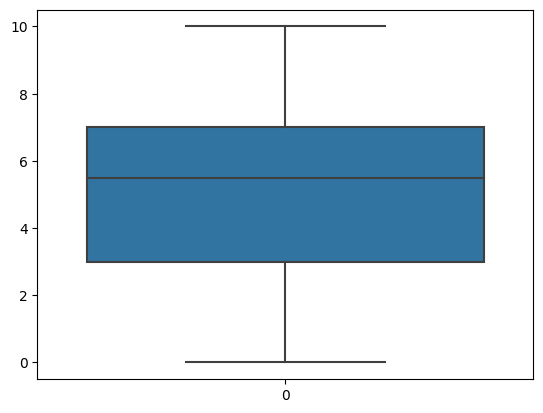

In [ ]:
sns.boxplot(new_df.Application_Type)

Note : There are no outliers in Application_Type feature.

<Axes: >

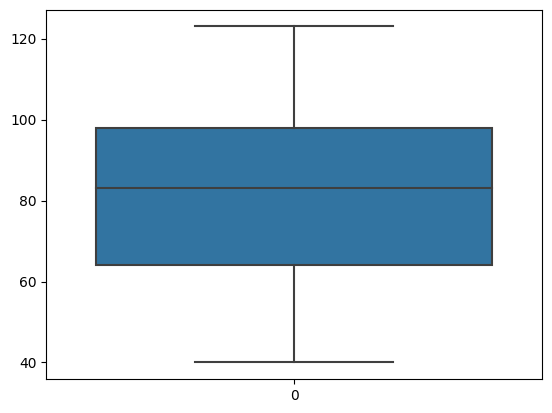

In [ ]:
sns.boxplot(new_df.Signal_Strength)

Note : There are no outliers in Signal_Strength feature.

<Axes: >

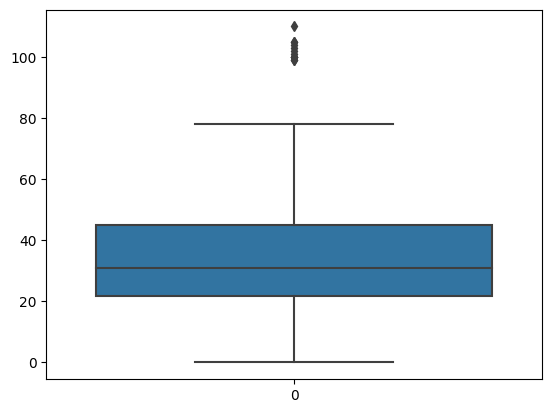

In [ ]:
sns.boxplot(new_df.Latency)

In [ ]:
# Replacing outliers in Latencey with median of Latency

q1 = new_df.Latency.quantile(0.25) #Q1
q3 = new_df.Latency.quantile(0.75) #Q3
print(q1)
print(q3)

21.75
45.0


In [ ]:
IQR = q3 - q1
print(IQR)

23.25


In [ ]:
upper_limit = q3+(1.5)*(IQR)
lower_limit = q1-(1.5)*(IQR)
print(upper_limit)
print(lower_limit)

79.875
-13.125


In [ ]:
new_df.Latency.median()

31.0

<Axes: >

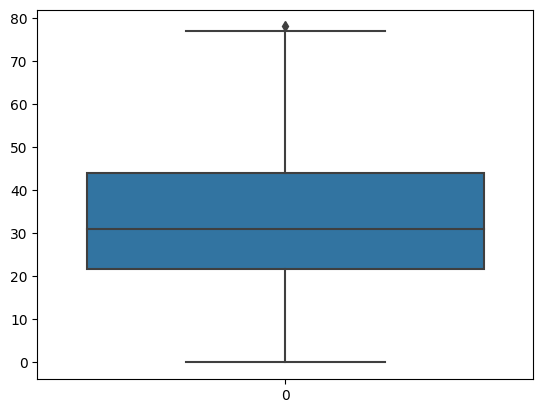

In [ ]:
new_df['Latency'] = np.where(new_df['Latency'] > upper_limit, new_df.Latency.median(), new_df['Latency'])
sns.boxplot(new_df.Latency)

Note : Outliers in Latency column are replaced using Median of Latency

In [ ]:
# Replacing outliers in Allocated_Bandwidth(Kbps) with median

q1_AB = new_df['Allocated_Bandwidth(Kbps)'].quantile(0.25) #Q1
q3_AB = new_df['Allocated_Bandwidth(Kbps)'].quantile(0.75) #Q3
print(q1_AB)
print(q3_AB)

417.5
4531.200000000001


In [ ]:
IQR_AB = q3_AB - q1_AB
print(IQR_AB)

4113.700000000001


In [ ]:
upper_limit_AB = q3_AB+(1.5)*(IQR_AB)
lower_limit_AB = q1_AB-(1.5)*(IQR_AB)
print(upper_limit_AB)
print(lower_limit_AB)

10701.750000000002
-5753.050000000001


In [ ]:
new_df['Allocated_Bandwidth(Kbps)'].median()

1382.4

<Axes: >

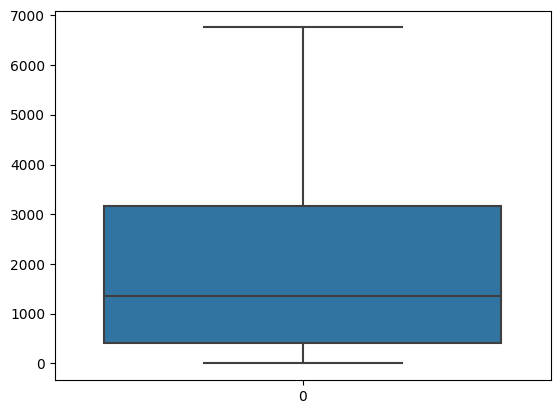

In [ ]:
new_df['Allocated_Bandwidth(Kbps)'] = np.where(new_df['Allocated_Bandwidth(Kbps)'] > upper_limit_AB, new_df['Allocated_Bandwidth(Kbps)'].median(), new_df['Allocated_Bandwidth(Kbps)'])
sns.boxplot(new_df['Allocated_Bandwidth(Kbps)'])

Note : Outliers in Allocated_Bandwidth(Kbps) column are replaced using Median

<Axes: >

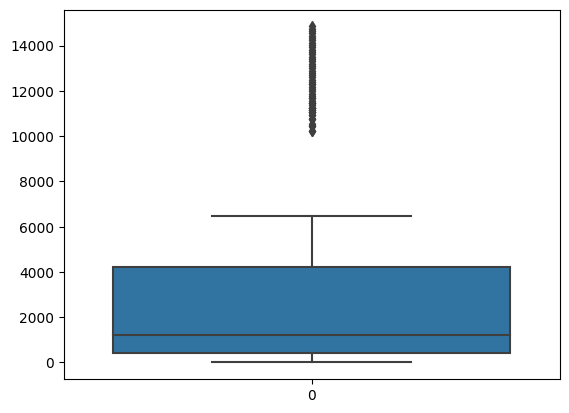

In [ ]:
sns.boxplot(new_df['Required_Bandwidth(Kbps)'])

In [ ]:
# Replacing outliers in Allocated_Bandwidth(Kbps) with median

q1_RB = new_df['Required_Bandwidth(Kbps)'].quantile(0.25) #Q1
q3_RB = new_df['Required_Bandwidth(Kbps)'].quantile(0.75) #Q3
print(q1_RB)
print(q3_RB)

417.5
4198.4


In [ ]:
IQR_RB = q3_RB - q1_RB
print(IQR_RB)

3780.8999999999996


In [ ]:
new_df['Required_Bandwidth(Kbps)'].median()

1228.8

In [ ]:
upper_limit_RB = q3_RB+(1.5)*(IQR_RB)
lower_limit_RB = q1_RB-(1.5)*(IQR_RB)
print(upper_limit_RB)
print(lower_limit_RB)

9869.75
-5253.849999999999


<Axes: >

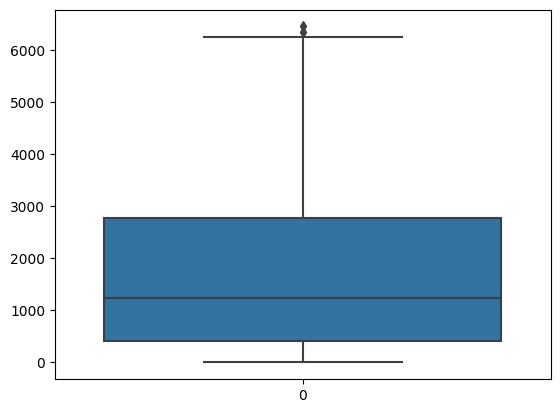

In [ ]:
new_df['Required_Bandwidth(Kbps)'] = np.where(new_df['Required_Bandwidth(Kbps)'] > upper_limit_RB, new_df['Required_Bandwidth(Kbps)'].median(), new_df['Required_Bandwidth(Kbps)'])
sns.boxplot(new_df['Required_Bandwidth(Kbps)'])

Note : Outliers in Required_Bandwidth(Kbps) column are replaced using Median

### Data Visualisation

In [ ]:
import plotly.express as px

Visualising Latency by Application_Type

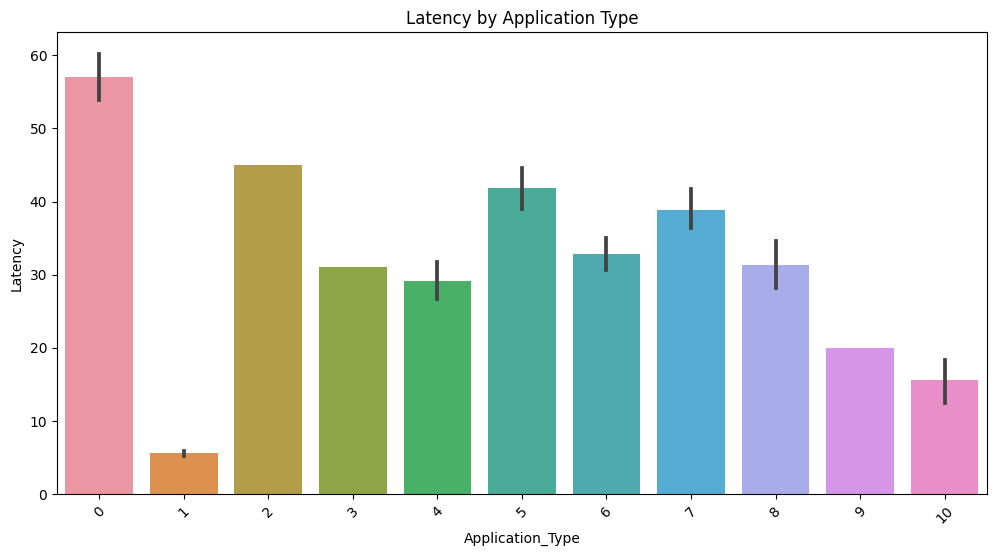

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Application_Type', y='Latency', data=new_df)
plt.title('Latency by Application Type')
plt.xticks(rotation=45)
plt.show()

Visualize Signal_Strength by Application_Type

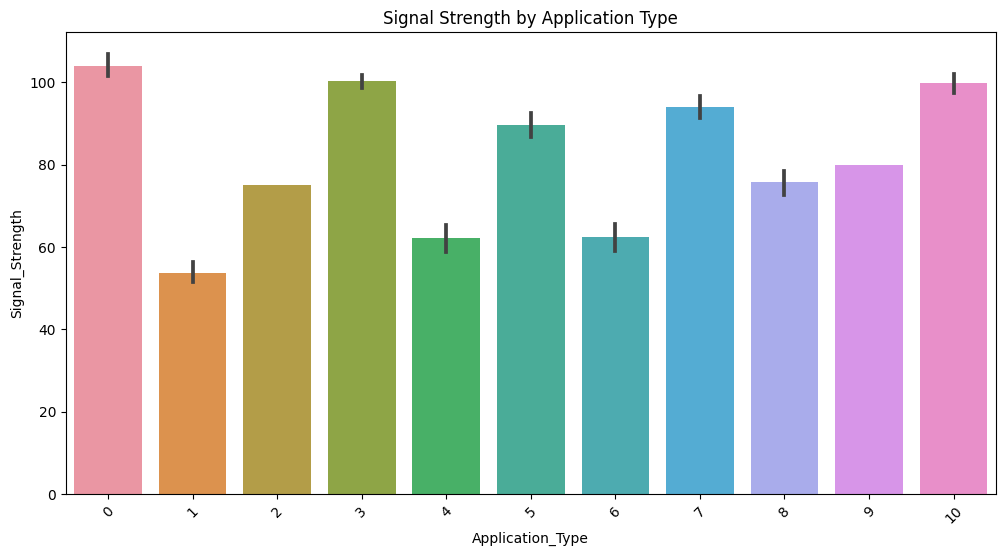

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Application_Type', y='Signal_Strength', data=new_df)
plt.title('Signal Strength by Application Type')
plt.xticks(rotation=45)
plt.show()

Visualising distribution of Application Types

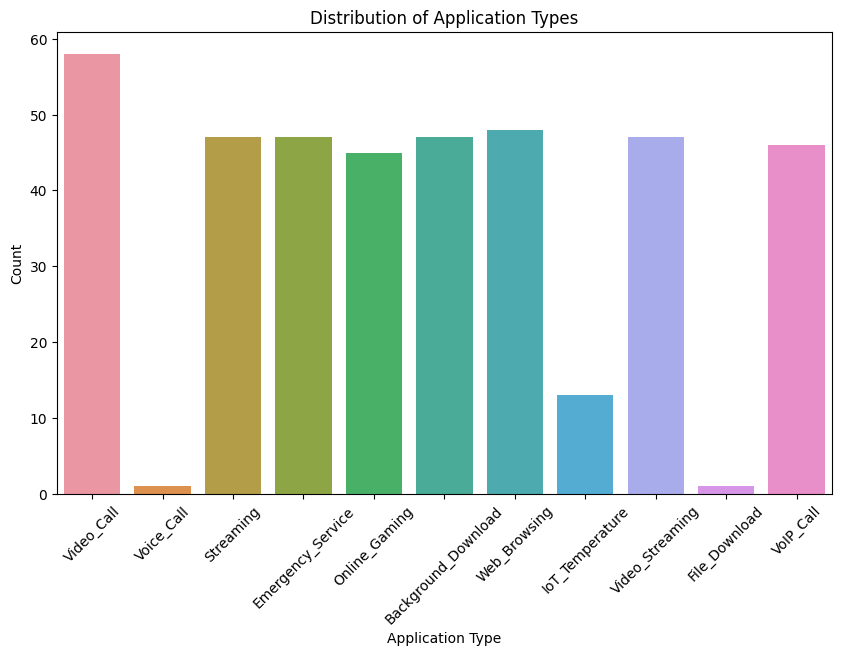

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Application_Type')
plt.title('Distribution of Application Types')
plt.xticks(rotation=45)
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.show()

Most Commonly Used Application Types


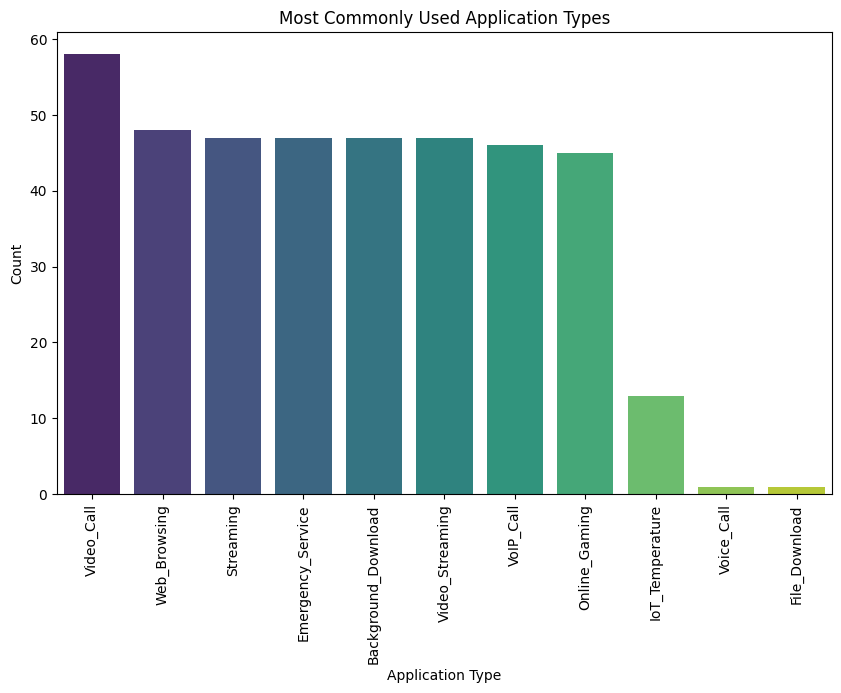

In [ ]:
application_counts = df['Application_Type'].value_counts()
application_counts

plt.figure(figsize=(10, 6))
sns.barplot(x=application_counts.index, y=application_counts.values, palette="viridis")
plt.title('Most Commonly Used Application Types')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Distribution of Resource Allocation

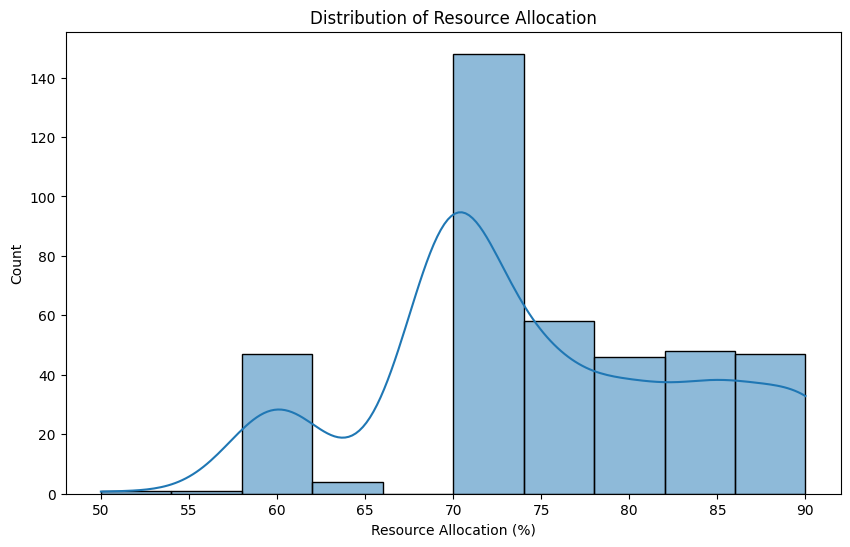

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='Resource_Allocation', bins=10 ,kde=True)
plt.title('Distribution of Resource Allocation')
plt.xlabel('Resource Allocation (%)')
plt.ylabel('Count')
plt.show()

Distribution of Signal Strength

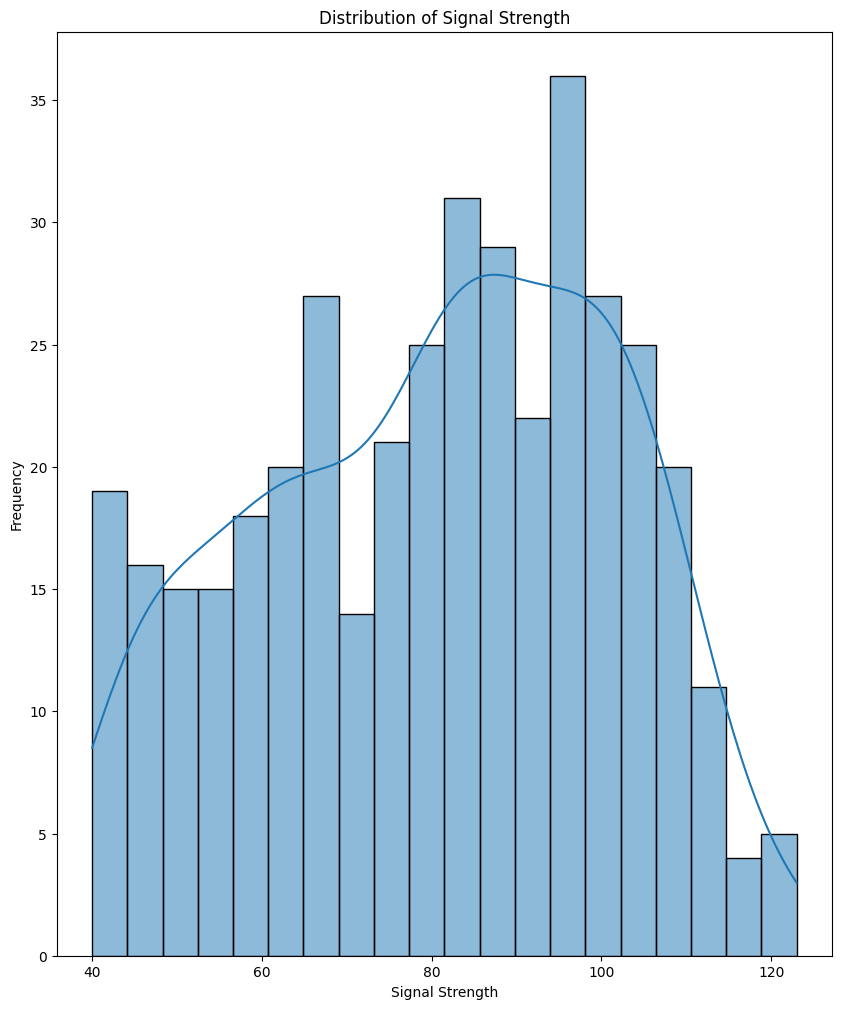

In [ ]:
plt.figure(figsize=(10, 12))
sns.histplot(data=new_df, x='Signal_Strength', bins=20, kde=True)
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()

Correlation between Signal Strength and Allocated Bandwidth

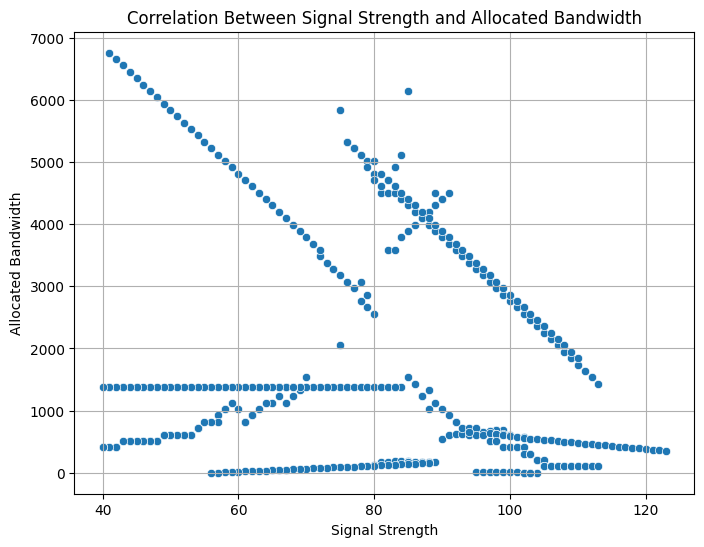

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_df, x='Signal_Strength', y='Allocated_Bandwidth(Kbps)',)
plt.title('Correlation Between Signal Strength and Allocated Bandwidth')
plt.xlabel('Signal Strength')
plt.ylabel('Allocated Bandwidth')
plt.grid(True)
plt.show()

Relationship between Allocated Bandwidth and Required Bandwidth

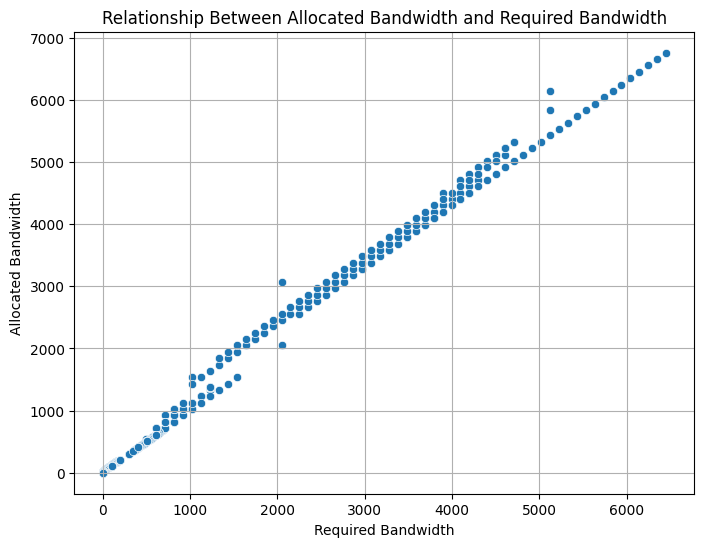

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_df, x='Required_Bandwidth(Kbps)', y='Allocated_Bandwidth(Kbps)')
plt.title('Relationship Between Allocated Bandwidth and Required Bandwidth')
plt.xlabel('Required Bandwidth')
plt.ylabel('Allocated Bandwidth')
plt.grid(True)
plt.show()

Top 8 application using high latency

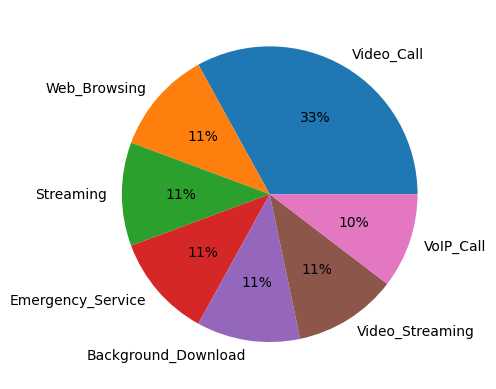

In [ ]:
app_name = df.Application_Type.value_counts().index
lat_val = df.Latency.value_counts().values
plt.pie(lat_val[:7],labels = app_name[:7],autopct='%1.f%%');

In [ ]:
new_df.corr()

,Application_Type,Signal_Strength,Latency,Resource_Allocation,Allocated_Bandwidth(Kbps),Required_Bandwidth(Kbps)
Application_Type,1.000000,0.154621,-0.196201,0.407625,-0.008163,-0.015911
Signal_Strength,0.154621,1.000000,0.358632,-0.303580,-0.201826,-0.221206
Latency,-0.196201,0.358632,1.000000,-0.104227,0.144511,0.132292
Resource_Allocation,0.407625,-0.303580,-0.104227,1.000000,0.245906,0.225896
Allocated_Bandwidth(Kbps),-0.008163,-0.201826,0.144511,0.245906,1.000000,0.997532
Required_Bandwidth(Kbps),-0.015911,-0.221206,0.132292,0.225896,0.997532,1.000000


<Axes: >

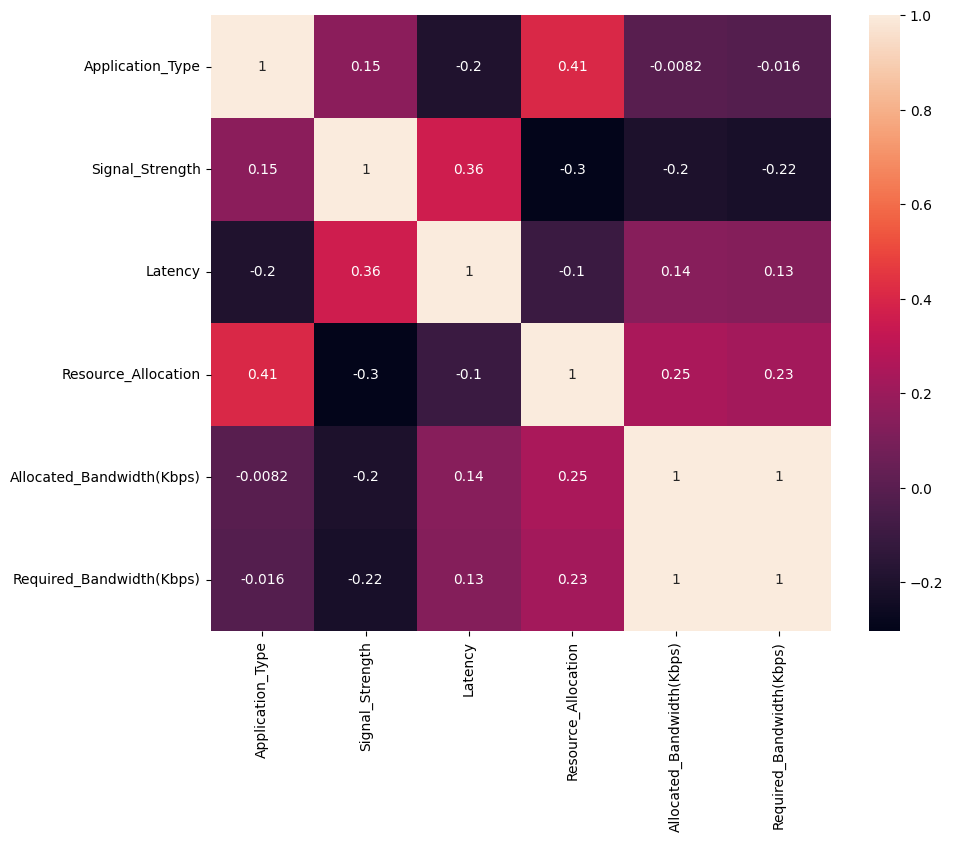

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),annot =True)

### X and Y splits

In [ ]:
Y=new_df['Resource_Allocation']
Y

0      70
1      80
2      75
3      90
4      85
       ..
395    85
396    75
397    70
398    70
399    70
Name: Resource_Allocation, Length: 400, dtype: int64

In [ ]:
X=new_df.drop(columns=['Resource_Allocation'],axis=1)
X

,Application_Type,Signal_Strength,Latency,Allocated_Bandwidth(Kbps),Required_Bandwidth(Kbps)
0,6,75,30.0,1382.4,1228.8
1,9,80,20.0,120.0,100.0
2,5,85,40.0,6144.0,5120.0
3,1,70,10.0,1536.0,1024.0
4,4,78,25.0,3072.0,2048.0
...,...,...,...,...,...
395,5,110,61.0,1843.2,1331.2
396,6,40,53.0,1382.4,1228.8
397,7,113,58.0,1433.6,1024.0
398,1,40,5.0,409.6,409.6


### Train and Test splits

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(280, 5)

In [ ]:
X_test.shape

(120, 5)

### Model Building

1. Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred =model.predict(X_test)
Y_pred

array([76.92508699, 61.20754668, 75.66290046, 75.28925538, 74.62980157,
       77.8985992 , 80.26793937, 78.05473885, 75.683449  , 62.56624432,
       67.02754646, 80.89874905, 70.64827235, 75.15461115, 74.91937557,
       75.5091728 , 71.65499689, 59.51995297, 73.77069576, 81.1763931 ,
       62.56624432, 77.45798428, 71.78983237, 73.22521182, 76.59051826,
       83.7653549 , 77.74245955, 77.37080064, 71.46937537, 81.09037807,
       78.39118879, 76.47937334, 78.15224687, 63.02746481, 62.05134353,
       71.80816479, 74.83715155, 72.74189456, 74.68669183, 77.98704484,
       78.19200262, 81.25711925, 71.11934168, 80.60042839, 75.09829778,
       73.45754917, 78.55626258, 78.12574304, 75.40669615, 78.09361078,
       70.27437891, 80.04508254, 76.19026938, 75.23220382, 73.27192764,
       76.14849214, 73.64138761, 78.48494566, 76.03365368, 74.70287361,
       81.09037807, 71.99940845, 73.4697971 , 66.04272381, 75.1207667 ,
       75.20436301, 59.9418514 , 80.880565  , 76.584463  , 75.04

In [ ]:
res = pd.DataFrame({'Actual Resource Allocated':Y_test,'Predictd Resource Allocation':Y_pred})
res

,Actual Resource Allocated,Predictd Resource Allocation
209,90,76.925087
280,60,61.207547
33,90,75.662900
210,80,75.289255
93,90,74.629802
...,...,...
60,70,75.447307
79,70,74.711882
285,70,78.160198
305,90,79.599369


2. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train,Y_train)
Y_pred_2 =model2.predict(X_test)
Y_pred_2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([90, 60, 70, 80, 70, 70, 90, 70, 80, 60, 60, 90, 70, 70, 90, 60, 70,
       60, 70, 90, 60, 80, 70, 70, 70, 75, 70, 90, 70, 85, 85, 90, 70, 60,
       60, 70, 70, 70, 70, 70, 70, 85, 70, 85, 70, 70, 85, 70, 60, 70, 70,
       90, 80, 70, 70, 70, 70, 70, 70, 70, 85, 70, 70, 90, 70, 70, 60, 75,
       80, 70, 60, 85, 75, 85, 75, 70, 85, 90, 60, 90, 85, 90, 80, 80, 80,
       70, 60, 70, 70, 70, 90, 70, 90, 75, 70, 80, 70, 75, 70, 85, 70, 70,
       70, 70, 60, 90, 70, 70, 85, 70, 60, 85, 75, 80, 90, 70, 70, 70, 90,
       90])

In [ ]:
res_2 = pd.DataFrame({'Actual Resource Allocated':Y_test,'Predictd Resource Allocation':Y_pred_2})
res_2

,Actual Resource Allocated,Predictd Resource Allocation
209,90,90
280,60,60
33,90,70
210,80,80
93,90,70
...,...,...
60,70,70
79,70,70
285,70,70
305,90,90


3. Decision-Tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model3 = DecisionTreeRegressor()
model3.fit(X_train,Y_train)
Y_pred_3 =model3.predict(X_test)
Y_pred_3

array([90., 60., 90., 80., 70., 75., 90., 75., 80., 60., 80., 90., 70.,
       70., 90., 65., 70., 60., 70., 90., 60., 85., 70., 70., 60., 75.,
       75., 90., 70., 85., 85., 90., 70., 60., 60., 70., 90., 70., 70.,
       75., 70., 85., 70., 85., 70., 70., 85., 70., 70., 70., 70., 90.,
       80., 70., 70., 70., 70., 75., 80., 70., 85., 70., 70., 75., 80.,
       80., 60., 75., 80., 90., 60., 85., 55., 85., 75., 70., 85., 90.,
       60., 90., 70., 65., 80., 80., 80., 90., 60., 70., 70., 70., 90.,
       70., 75., 75., 75., 80., 70., 75., 70., 85., 70., 70., 70., 70.,
       60., 65., 70., 70., 85., 70., 60., 85., 75., 80., 90., 70., 70.,
       70., 90., 90.])

In [ ]:
res_3 = pd.DataFrame({'Actual Resource Allocated':Y_test,'Predictd Resource Allocation':Y_pred_3})
res_3

,Actual Resource Allocated,Predictd Resource Allocation
209,90,90.0
280,60,60.0
33,90,90.0
210,80,80.0
93,90,70.0
...,...,...
60,70,70.0
79,70,70.0
285,70,70.0
305,90,90.0


4. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators=200)
model4.fit(X_train,Y_train)
Y_pred_4 =model4.predict(X_test)
Y_pred_4

array([89.85 , 60.   , 89.8  , 80.   , 81.925, 75.   , 90.   , 75.05 ,
       80.   , 60.   , 72.925, 89.925, 70.025, 69.95 , 87.775, 66.45 ,
       70.   , 60.   , 70.05 , 89.85 , 60.   , 84.95 , 70.   , 70.   ,
       65.025, 75.   , 75.   , 89.875, 70.   , 84.975, 84.475, 89.725,
       70.   , 60.   , 60.   , 70.   , 86.825, 70.   , 70.   , 75.   ,
       70.   , 84.975, 70.   , 85.   , 70.   , 70.   , 84.975, 70.   ,
       69.175, 69.95 , 70.05 , 90.   , 80.   , 73.6  , 70.   , 70.   ,
       70.   , 74.975, 73.425, 70.   , 84.975, 70.   , 70.   , 74.95 ,
       80.   , 77.275, 60.   , 75.   , 80.   , 88.725, 60.   , 84.975,
       56.85 , 85.   , 75.   , 70.   , 84.65 , 89.8  , 60.   , 90.   ,
       70.15 , 65.3  , 80.   , 80.   , 80.   , 90.   , 60.   , 70.   ,
       70.   , 70.925, 89.875, 70.   , 74.95 , 75.   , 75.05 , 80.   ,
       70.   , 75.   , 70.05 , 84.975, 70.   , 71.3  , 70.325, 70.   ,
       60.   , 65.425, 71.7  , 69.95 , 84.925, 70.   , 60.   , 84.625,
      

In [ ]:
res_4 = pd.DataFrame({'Actual Resource Allocated':Y_test,'Predictd Resource Allocation':Y_pred_4})
res_4

,Actual Resource Allocated,Predictd Resource Allocation
209,90,89.850
280,60,60.000
33,90,89.800
210,80,80.000
93,90,81.925
...,...,...
60,70,74.325
79,70,70.000
285,70,70.000
305,90,90.000


5. Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
degree = 2
model5 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model5.fit(X_train,Y_train)
Y_pred_5 =model5.predict(X_test)
Y_pred_5

array([87.5582241 , 59.27519224, 86.77728485, 79.42044578, 84.48279387,
       78.66670079, 91.07010447, 79.10756745, 79.55544609, 61.85080251,
       66.28641891, 91.34839834, 70.73483176, 68.64339148, 84.44808702,
       66.39744517, 68.39382469, 60.72300185, 71.44944881, 91.21027829,
       61.85080251, 90.49155003, 68.10967174, 71.34346398, 75.99547282,
       70.15623264, 78.23444479, 88.14720736, 68.44289379, 82.84888129,
       84.45171442, 86.93209236, 69.91796689, 59.96392638, 58.76332384,
       70.97107281, 84.75792387, 68.80475138, 72.57515981, 77.79996165,
       72.44740111, 82.17148193, 70.94966197, 85.57022652, 69.58695071,
       69.50677826, 84.06864177, 68.92037991, 64.28654464, 68.82255322,
       71.27642941, 90.90098894, 80.32477812, 75.82773887, 69.48990838,
       68.96818098, 69.87399099, 78.84270868, 75.70793415, 69.54290305,
       82.84888129, 68.8752136 , 71.84596228, 71.52541727, 78.8791158 ,
       78.82814356, 60.30804034, 76.20371551, 81.38651651, 85.02

In [ ]:
res_5 = pd.DataFrame({'Actual Resource Allocated':Y_test,'Predictd Resource Allocation':Y_pred_5})
res_5

,Actual Resource Allocated,Predictd Resource Allocation
209,90,87.558224
280,60,59.275192
33,90,86.777285
210,80,79.420446
93,90,84.482794
...,...,...
60,70,75.685019
79,70,72.497924
285,70,70.324681
305,90,90.534897


6. Ridge and Lasso regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
r = Ridge()
l = Lasso()

In [ ]:
r.fit(X_train,Y_train)

Ridge()

In [ ]:
Y_pred_6 =r.predict(X_test)
Y_pred_6

array([76.92332261, 61.20951088, 75.66157546, 75.28983079, 74.62875413,
       77.89796125, 80.2652132 , 78.05411254, 75.68357851, 62.56865196,
       67.02826979, 80.89575303, 70.65080549, 75.15220788, 74.91818825,
       75.5065522 , 71.65708507, 59.52177695, 73.76895731, 81.17318466,
       62.56865196, 77.45829332, 71.78892348, 73.22374101, 76.58986289,
       83.76291053, 77.74180996, 77.36890802, 71.47148977, 81.09086812,
       78.39129588, 76.4777372 , 78.15153764, 63.02974417, 62.05337784,
       71.81066758, 74.83604004, 72.7438512 , 74.68929157, 77.98629327,
       78.19111271, 81.25757276, 71.12189771, 80.60088524, 75.0959582 ,
       73.45942673, 78.55662905, 78.12515426, 75.40401224, 78.09307192,
       70.27697655, 80.04242049, 76.18982558, 75.23180777, 73.27383143,
       76.1477011 , 73.63961168, 78.48419116, 76.03307699, 74.70060027,
       81.09086812, 72.00147   , 73.46822432, 66.04414144, 75.12167573,
       75.20532504, 59.94371043, 80.87906753, 76.5835733 , 75.04

In [ ]:
res_6 = pd.DataFrame({'Actual Resource Allocated':Y_test,'Predictd Resource Allocation':Y_pred_6})
res_6

,Actual Resource Allocated,Predictd Resource Allocation
209,90,76.923323
280,60,61.209511
33,90,75.661575
210,80,75.289831
93,90,74.628754
...,...,...
60,70,75.446847
79,70,74.711273
285,70,78.159453
305,90,79.596835


In [ ]:
l.fit(X_train,Y_train)
Y_pred_7 =l.predict(X_test)
Y_pred_7

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.814e+03, tolerance: 2.164e+00
  model = cd_fast.enet_coordinate_descent(


array([76.46374836, 61.65322562, 75.38081153, 75.48982512, 74.45462015,
       77.70297598, 79.42109628, 77.86256959, 75.75018161, 63.17979138,
       67.20571133, 79.95040964, 71.31261858, 74.67154688, 74.68933961,
       74.95777977, 72.16908522, 59.91683172, 73.51489474, 80.1529101 ,
       63.17979138, 77.56118912, 71.8475417 , 73.06816613, 76.3961113 ,
       82.85524763, 77.54338238, 76.85806142, 71.99443368, 81.19624917,
       78.24708368, 76.0694353 , 77.97391653, 63.58899854, 62.52142257,
       72.43865592, 74.63688257, 73.19485859, 75.29788381, 77.74814979,
       77.86774782, 81.32753112, 71.78432147, 80.68117669, 74.63435309,
       73.87132889, 78.66418851, 78.04469567, 74.84245787, 78.03671565,
       70.97039342, 79.22393975, 76.08492568, 75.14343467, 73.69667736,
       76.03658962, 73.37743699, 78.24198853, 75.87215669, 74.25583626,
       81.19624917, 72.49625244, 73.27293354, 66.46155381, 75.39086644,
       75.46281875, 60.3509302 , 80.34385067, 76.34528218, 74.81

In [ ]:
res_7 = pd.DataFrame({'Actual Resource Allocated':Y_test,'Predictd Resource Allocation':Y_pred_7})
res_7

,Actual Resource Allocated,Predictd Resource Allocation
209,90,76.463748
280,60,61.653226
33,90,75.380812
210,80,75.489825
93,90,74.454620
...,...,...
60,70,75.333144
79,70,74.697805
285,70,77.952683
305,90,78.829627


### Performance Testing

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report

1. Linear Regression

In [ ]:
Y_pred_train =model.predict(X_train)
print("Training accuracy:", metrics.r2_score(Y_train, Y_pred_train))
print("Testing accuracy:", metrics.r2_score(Y_test, Y_pred))

Training accuracy: 0.4459470053203387
Testing accuracy: 0.45519202093287425


2. Logistic regression

In [ ]:
Y_pred_2_train =model2.predict(X_train)
print("Training accuracy:", accuracy_score(Y_train, Y_pred_2_train))
print("Testing accuracy:", accuracy_score(Y_test, Y_pred_2))

Training accuracy: 0.7714285714285715
Testing accuracy: 0.7833333333333333


In [ ]:
# Classification report for Logistic Regression

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
print(classification_report(Y_test, Y_pred_2))

              precision    recall  f1-score   support

          50       0.00      0.00      0.00         1
          60       0.80      1.00      0.89        12
          70       0.72      0.87      0.79        47
          75       0.86      0.38      0.52        16
          80       0.90      0.75      0.82        12
          85       0.92      1.00      0.96        12
          90       0.78      0.70      0.74        20

    accuracy                           0.78       120
   macro avg       0.71      0.67      0.67       120
weighted avg       0.79      0.78      0.77       120



3. Decision-Tree Regressor

In [ ]:
Y_pred_3_train =model3.predict(X_train)
print("Training accuracy:", accuracy_score(Y_train, Y_pred_3_train))
print("Testing accuracy:", accuracy_score(Y_test, Y_pred_3))

Training accuracy: 1.0
Testing accuracy: 0.9


In [ ]:
# Classification report for Decision-Tree Regressor

warnings.filterwarnings("ignore", category=UserWarning)
print(classification_report(Y_test, Y_pred_3))

              precision    recall  f1-score   support

        50.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         0
        60.0       0.92      1.00      0.96        12
        65.0       0.00      0.00      0.00         0
        70.0       0.91      0.87      0.89        47
        75.0       1.00      0.88      0.93        16
        80.0       0.85      0.92      0.88        12
        85.0       0.92      1.00      0.96        12
        90.0       1.00      0.90      0.95        20

    accuracy                           0.90       120
   macro avg       0.62      0.62      0.62       120
weighted avg       0.93      0.90      0.91       120



4. Random Forest Regressor

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Training Accuracy
Y_pred_4_train = model4.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_pred_4_train)
train_r2 = r2_score(Y_train, Y_pred_4_train)

# Testing Accuracy
test_mse = mean_squared_error(Y_test, Y_pred_4)
test_r2 = r2_score(Y_test, Y_pred_4)

print("Training Mean Squared Error:", train_mse)
print("Training R-squared:", train_r2)
print("Testing Mean Squared Error:", test_mse)
print("Testing R-squared:", test_r2)



Training Mean Squared Error: 0.6152700892857146
Training R-squared: 0.9920387235464745
Testing Mean Squared Error: 11.069541666666662
Testing R-squared: 0.8733301017164654


5. Polynomial regression

In [ ]:
# Training Accuracy
Y_pred_5_train = model5.predict(X_train)
train_mse_1 = mean_squared_error(Y_train, Y_pred_5_train)
train_r2_1 = r2_score(Y_train, Y_pred_5_train)

# Testing Accuracy
test_mse_1 = mean_squared_error(Y_test, Y_pred_5)
test_r2_1 = r2_score(Y_test, Y_pred_5)

print("Training Mean Squared Error:", train_mse_1)
print("Training R-squared:", train_r2_1)
print("Testing Mean Squared Error:", test_mse_1)
print("Testing R-squared:", test_r2_1)

Training Mean Squared Error: 7.972230137280628
Training R-squared: 0.896843468942717
Testing Mean Squared Error: 16.679811891179092
Testing R-squared: 0.8091312053139074


6. Lasso and Ridge Regression

In [ ]:
print(metrics.r2_score(Y_test,Y_pred_6))
print(metrics.r2_score(Y_test,Y_pred_7))

0.4551633270806721
0.4439657852090051


Note: Random Forest Regressor is found to be the best model with "Training r2-score : 99.20%" and "Testing r2-score : 87.3%"

### Model Deployment

In [ ]:
import pickle
pickle.dump(model4,open('5G_Quality.pkl','wb'))

### Testing with random values


In [ ]:
model4.predict([[6,85,30,2560,5240]])

array([72.8])

In [ ]:
model4.predict([[10,75,20,15050,18952]])

array([66.575])

In [ ]:
model4.predict([[2,75,20,20,58]])

array([73.125])